# I. Read the Dataset ‘modifiedfifa.csv' and answer the following questions. (15 marks)

In [15]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Read file
data = pd.read_csv('modifiedfifa.csv')
data

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight
0,0,16,Luis Garc¡a,37,Spain,71,71,KAS Eupen,750.0,?6K,...,3.0,Medium/ Medium,Lean,No,RCM,10.0,19-Jul-14,2019,70,143
1,1,41,Iniesta,34,Spain,86,86,Vissel Kobe,21500.0,?21K,...,4.0,High/ Medium,Normal,Yes,LF,8.0,16-Jul-18,2021,67,150
2,2,80,E. Belzo?lu,37,Turkey,79,79,Medipol Ba?ak?ehir FK,4000.0,?23K,...,4.0,Medium/ Medium,Stocky,No,CM,5.0,9-Jul-15,2019,67,159
3,3,164,G. Pinzi,37,Italy,70,70,Padova,240.0,?2K,...,3.0,Low/ High,Normal,No,LCM,11.0,31-Aug-17,2019,71,168
4,4,657,D. Vaughan,35,Wales,66,66,Notts County,150.0,?4K,...,2.0,Medium/ High,Stocky,No,CDM,8.0,6-Jul-18,2019,66,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15109,15109,246608,Fidalgo,21,Spain,65,75,Real Madrid,875.0,?20K,...,3.0,High/ Medium,Lean,No,CM,36.0,1-Jul-16,2019,69,150
15110,15110,246613,J. Zwarts,19,Netherlands,62,77,Feyenoord,650.0,?1K,...,3.0,High/ Medium,Normal,No,ST,39.0,13-Apr-18,2019,73,163
15111,15111,246616,Jos Uche,18,Spain,58,69,SD Huesca,180.0,?1K,...,2.0,Low/ High,Lean,No,CB,26.0,1-Jul-18,2019,72,161
15112,15112,246617,Javi Mier,19,Spain,62,76,Real Oviedo,650.0,?1K,...,3.0,Medium/ Low,Lean,No,CAM,36.0,8-Dec-18,2019,69,143


In [17]:
# Check for missing values
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
dtype: int64

# 1. Find how many different countries players data is included in the dataset (1 Mark)

In [16]:
print('Total number of countries: {0}'.format(data['Nationality'].nunique()))

Total number of countries: 159


# 2. Find out highest Valued player from the dataset (1 Mark)

In [20]:
print('Most valued player : '+str(data.loc[data['Value'].idxmax()][2]))

Most valued player : Neymar Jr


# 3. Find which country's players data is maximum in the dataset and what’s is the count of it (2 Marks)

In [42]:
data.sort_values(by=['Potential','Overall'])[['Nationality','Name']].max()

Nationality        Zimbabwe
Name           verton Luiz
dtype: object

In [43]:
count = data.sort_values(by=['Potential','Overall'])[['Nationality','Name']].max()
count.nunique()

2

# 4. Display top 10 clubs ordered by sum of all player’s current market value of that club (3 Marks)

In [59]:
data.groupby('Club')['Value'].sum().sort_values(ascending = False).head(10)

Club
Real Madrid            810600.0
FC Barcelona           807800.0
Juventus               674975.0
Manchester City        668655.0
Paris Saint-Germain    625325.0
Liverpool              569055.0
FC Bayern Mnchen      560225.0
Chelsea                533815.0
Manchester United      529475.0
Tottenham Hotspur      526875.0
Name: Value, dtype: float64

# 5. Count the number of players having International Reputation ratings = 4 from the clubs 'Real Madrid’ and ‘FC Barcelona’ (3 Marks)

In [28]:
Players=data.loc[(data['International Reputation']==4)&(data['Club'].isin(['Real Madrid', 'FC Barcelona']))][['International Reputation','Club']]
Players

,International Reputation,Club
487,4.0,FC Barcelona
549,4.0,Real Madrid
848,4.0,Real Madrid
953,4.0,FC Barcelona
1232,4.0,Real Madrid
1364,4.0,Real Madrid
1698,4.0,FC Barcelona
1766,4.0,Real Madrid
2556,4.0,FC Barcelona
2930,4.0,Real Madrid


In [30]:
Players.count()

International Reputation    10
Club                        10
dtype: int64

# 6. Find out the names of the youngest and oldest players from the dataset (5 Marks)

In [40]:
print("Oldest Players: ")
data.loc[data['Age'] == data['Age'].max()][['ID','Name','Age']]

Oldest Players: 


,ID,Name,Age
98,51963,T. Warner,44
118,53748,K. Pilkington,44


In [41]:
#Youngest Player
print("Youngest Players: ")
data.loc[data['Age'] == data['Age'].min()][['ID','Name','Age']]

Youngest Players: 


,ID,Name,Age
12178,239594,J. Imbrechts,16
12510,240562,D. Adshead,16
12755,241266,W. Geubbels,16
12844,241552,J. Italiano,16
12877,241638,B. Worman,16
12884,241650,J. Lahne,16
13034,242074,R. G¢mez,16
13090,242165,R. Hauge,16
13130,242240,L. D'Arrigo,16
13515,243169,Y. Begraoui,16


# II. Read the dataset atheletes.csv and regions.csv and answer the following questions.

In [18]:
# read a file
athlete= pd.read_csv('athlete_events.csv')
athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [19]:
#read a file
regions = pd.read_csv('regions.csv')
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# 1. Merge the dataset athletes and regions. (2 Marks)

In [20]:
# merging both athletes and regions dataset
df = pd.merge(athlete, regions, on='NOC', how='left')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [21]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [22]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df['Height'].fillna(value=df['Height'].mean(),inplace=True)
df['Weight'].fillna(value=df['Weight'].mean(),inplace=True)

In [23]:
df['region'].fillna(value="Region Unknown",inplace=True)
df['Medal'].fillna(value="Medal Not Won",inplace=True)

In [24]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region         0
notes     266077
dtype: int64

# 2. Show the distribution of the age of gold medallists (4 Marks)

In [25]:
# Creating a new data frame including only gold medalists.
goldMedals = df[(df.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.00000,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


Text(0.5, 1.0, 'Distribution of Gold Medals')

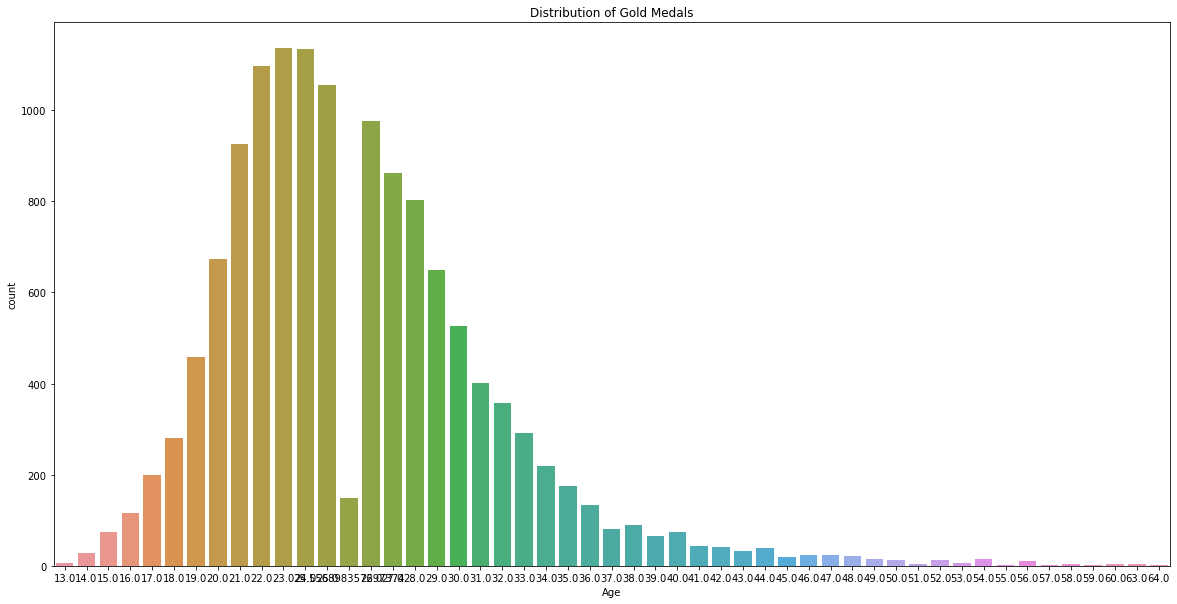

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(goldMedals['Age'])   
plt.title('Distribution of Gold Medals')

# 3.Display the number of athletes who are gold medallists and whose age is greater than 50 with their info. (4 Marks)

In [27]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

65

Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

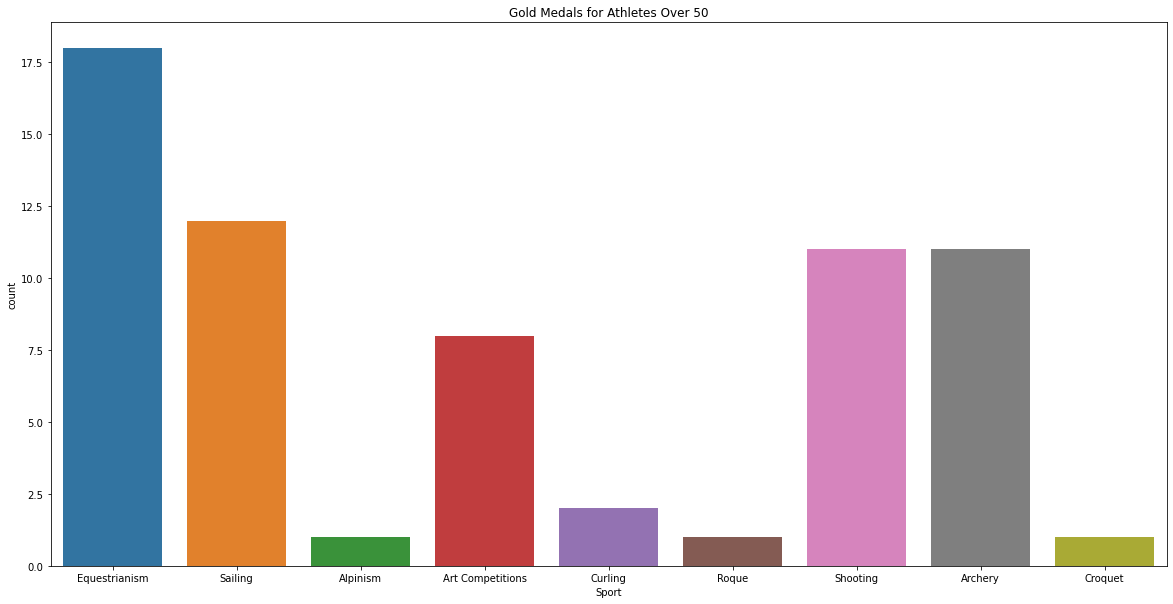

In [28]:
GoldMedalists = goldMedals['Sport'][goldMedals['Age'] > 50]
plt.figure(figsize=(20, 10))
sns.countplot(GoldMedalists)
plt.title('Gold Medals for Athletes Over 50')

# 4. Women who can play in summer (2 Marks) 

In [32]:
womenInOlympics = df[(df.Sex == 'F') & (df.Season == 'Summer')]
womenInOlympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Medal Not Won,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,Medal Not Won,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.500000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.500000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,70.702393,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.000000,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.000000,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",Medal Not Won,Greece,NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.000000,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.000000,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,Russia,NaN


# 5. Display the top 5 countries who won the most medals. Support your answer with suitable plot. (3 Marks)

In [118]:
Medals = df.region.value_counts().reset_index(name='Medal').head(5)
Medals

,index,Medal
0,USA,18853
1,Germany,15883
2,France,12758
3,UK,12256
4,Russia,11692


Text(0.5, 1.0, 'Top 5 countries')

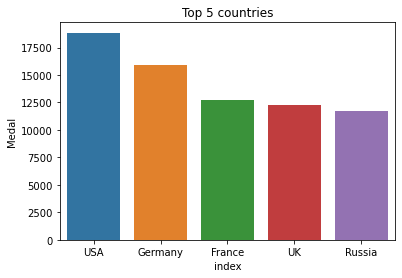

In [119]:
sns.barplot(x="index", y="Medal", data=Medals)
plt.title('Top 5 countries')

In [ ]:
* USA, Germany, France, UK, Russia are the top 5 countries who won the most medals.